# 🚀 YOLOv12 Custom Object Detection Project

Welcome! This notebook demonstrates how to train, evaluate, and deploy a YOLOv12 object detection model using a Roboflow dataset, with interactive inference on your own images.  

## 📚 Table of Contents

1. [Setup and Installation](#setup)
2. [Dataset Download](#dataset)
3. [Model Training](#training)
4. [Performance Evaluation](#evaluation)
5. [Inference on Custom Images](#inference)
6. [Conclusion](#Conclusion)


## 1. Setup and Installation
Clone the YOLOv12 repository and install dependencies.


In [1]:
# Clone YOLOv12 repository
!git clone https://github.com/sunsmarterjie/yolov12.git
%cd yolov12

# Download the correct FlashAttention wheel for Colab's CUDA 12.1 environment
!wget https://github.com/Dao-AILab/flash-attention/releases/download/v2.7.3/flash_attn-2.7.3+cu12torch2.2cxx11abiFALSE-cp311-cp311-linux_x86_64.whl

# Install dependencies (modified for Colab compatibility)
!pip install -r requirements.txt --no-deps  # Skip conflicting dependencies
!pip install flash_attn-2.7.3+cu12torch2.2cxx11abiFALSE-cp311-cp311-linux_x86_64.whl
!pip install roboflow ultralytics --upgrade -q
!pip install -e .  # Install YOLOv12 in editable mode

# Install system dependencies
!apt install -y libgl1-mesa-glx
!pip install ninja  # Required for FlashAttention compilation


Cloning into 'yolov12'...
remote: Enumerating objects: 980, done.
remote: Counting objects: 100% (287/287), done.
remote: Compressing objects: 100% (56/56), done.
remote: Total 980 (delta 258), reused 231 (delta 231), pack-reused 693 (from 1)
Receiving objects: 100% (980/980), 1.58 MiB | 3.97 MiB/s, done.
Resolving deltas: 100% (474/474), done.
/content/yolov12
--2025-05-27 08:04:50--  https://github.com/Dao-AILab/flash-attention/releases/download/v2.7.3/flash_attn-2.7.3+cu12torch2.2cxx11abiFALSE-cp311-cp311-linux_x86_64.whl
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://objects.githubusercontent.com/github-production-release-asset-2e65be/494232964/5d1f64b1-b698-4a24-8221-235fd9ffbb2b?X-Amz-Algorithm=AWS4-HMAC-SHA256&X-Amz-Credential=releaseassetproduction%2F20250527%2Fus-east-1%2Fs3%2Faws4_request&X-Amz-Date=20250527T080450Z&X-Amz-Expires=300&X-A

## 2. Dataset Download & Preparation
Download the dataset from Roboflow and prepare it for training.


In [3]:
from roboflow import Roboflow
import os

# Download dataset
rf = Roboflow(api_key="EzPlKHl5hYSAEWWSwOn4")
project = rf.workspace("hu-yuxin").project("yolov12-wujhx")
dataset = project.version(3).download("yolov8")

# Fix data.yaml paths
data_yaml_path = os.path.join(dataset.location, "data.yaml")
with open(data_yaml_path, 'r') as f:
    lines = f.readlines()
with open(data_yaml_path, 'w') as f:
    f.writelines(lines[:-4])  # Remove existing path lines
    f.write(f"train: {dataset.location}/train/images\n")
    f.write(f"val: {dataset.location}/valid/images\n")
    f.write(f"test: {dataset.location}/test/images\n")

print(f"Dataset ready at: {dataset.location}")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to YOLOv12-3 in yolov8:: 100%|██████████| 1220/1220 [00:00<00:00, 7121.55it/s]


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/yolov12/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
FlashAttention is not available on this device. Using scaled_dot_product_attention instead.
Dataset ready at: /content/yolov12/YOLOv12-3


## 3. Model Training
Train the YOLOv12 model on the prepared dataset.


In [4]:
from ultralytics import YOLO

# Load model (use YOLOv8 if YOLOv12 weights are missing)
model = YOLO("yolov12s.pt")  # Replace with "yolov8s.pt" if needed

# Train
results = model.train(
    data=data_yaml_path,
    epochs=100,
    imgsz=640,
    batch=16,
    name="yolov12_custom_training"
)


100%|██████████| 17.8M/17.8M [00:00<00:00, 113MB/s] 


New https://pypi.org/project/ultralytics/8.3.145 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.63 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov12s.pt, data=/content/yolov12/YOLOv12-3/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=yolov12_custom_training, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed

100%|██████████| 755k/755k [00:00<00:00, 21.4MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1      9344  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2, 1, 2]          
  2                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  3                  -1  1     37120  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2, 1, 4]        
  4                  -1  1    103360  ultralytics.nn.modules.block.C3k2            [128, 256, 1, False, 0.25]    
  5                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
  6                  -1  2    677120  ultralytics.nn.modules.block.A2C2f           [256, 256, 2, True, 4]        
  7                  -1  1   1180672  ultralytics

100%|██████████| 5.26M/5.26M [00:00<00:00, 80.0MB/s]


AMP: checks passed ✅


train: Scanning /content/yolov12/YOLOv12-3/train/labels... 423 images, 0 backgrounds, 0 corrupt: 100%|██████████| 423/423 [00:00<00:00, 2514.55it/s]

train: New cache created: /content/yolov12/YOLOv12-3/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


A new version of Albumentations is available: '2.0.7' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
Argument(s) 'quality_lower' are not valid for transform ImageCompression
val: Scanning /content/yolov12/YOLOv12-3/valid/labels... 121 images, 0 backgrounds, 0 corrupt: 100%|██████████| 121/121 [00:00<00:00, 1591.90it/s]

val: New cache created: /content/yolov12/YOLOv12-3/valid/labels.cache


Plotting labels to /content/yolov12/runs/detect/yolov12_custom_training/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 121 weight(decay=0.0), 128 weight(decay=0.0005), 127 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /content/yolov12/runs/detect/yolov12_custom_training
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      6.73G      1.473      3.297      1.659         18        640: 100%|██████████| 27/27 [00:16<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.24it/s]

                   all        121        121     0.0816      0.207     0.0593     0.0157



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      6.82G      1.686      2.139      1.761         16        640: 100%|██████████| 27/27 [00:14<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.94it/s]

                   all        121        121     0.0112      0.339    0.00539    0.00172



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      6.65G      1.775      2.134      1.841         16        640: 100%|██████████| 27/27 [00:14<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.21it/s]

                   all        121        121     0.0112      0.339    0.00539    0.00172



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      6.65G      1.914      2.288      1.948         21        640: 100%|██████████| 27/27 [00:14<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.90it/s]

                   all        121        121    0.00181     0.0331   0.000298   0.000104



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      6.66G      1.711      2.004      1.784         10        640: 100%|██████████| 27/27 [00:14<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.60it/s]

                   all        121        121     0.0118      0.595     0.0108    0.00348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      6.83G        1.6      1.932        1.7         18        640: 100%|██████████| 27/27 [00:14<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.64it/s]

                   all        121        121      0.151      0.149     0.0801     0.0218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      6.81G      1.574      1.828      1.635         22        640: 100%|██████████| 27/27 [00:14<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.96it/s]

                   all        121        121     0.0962      0.355     0.0726     0.0268



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      6.66G      1.482      1.705      1.579         20        640: 100%|██████████| 27/27 [00:14<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.63it/s]

                   all        121        121     0.0312       0.19     0.0114    0.00309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      6.65G      1.457      1.684      1.537         22        640: 100%|██████████| 27/27 [00:14<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.66it/s]

                   all        121        121      0.105      0.322     0.0872      0.031



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      6.83G      1.407       1.67      1.517         13        640: 100%|██████████| 27/27 [00:14<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.14it/s]

                   all        121        121      0.106      0.281     0.0615     0.0205



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      6.65G      1.403      1.609      1.502         14        640: 100%|██████████| 27/27 [00:14<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.65it/s]

                   all        121        121      0.376      0.256      0.241     0.0666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      6.83G      1.319      1.572      1.462          9        640: 100%|██████████| 27/27 [00:14<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.62it/s]

                   all        121        121      0.329      0.488      0.361      0.177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      6.65G      1.427      1.645       1.52         16        640: 100%|██████████| 27/27 [00:14<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.09it/s]

                   all        121        121      0.358      0.405      0.353      0.147



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      6.66G       1.27       1.57      1.461         12        640: 100%|██████████| 27/27 [00:14<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.64it/s]

                   all        121        121      0.672      0.719      0.719      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      6.81G      1.272      1.509      1.434         13        640: 100%|██████████| 27/27 [00:14<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.60it/s]

                   all        121        121      0.621      0.785        0.8      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      6.82G      1.235      1.532        1.4         15        640: 100%|██████████| 27/27 [00:14<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.91it/s]

                   all        121        121      0.499      0.575      0.488      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      6.65G      1.239      1.439      1.413         23        640: 100%|██████████| 27/27 [00:14<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.59it/s]

                   all        121        121      0.568      0.631      0.618      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      6.66G      1.276      1.481      1.411         12        640: 100%|██████████| 27/27 [00:14<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.60it/s]

                   all        121        121      0.732      0.746      0.824      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      6.81G      1.205      1.378       1.39         20        640: 100%|██████████| 27/27 [00:14<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.06it/s]

                   all        121        121      0.674       0.77       0.73      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      6.83G      1.188      1.415      1.396         13        640: 100%|██████████| 27/27 [00:14<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.30it/s]

                   all        121        121       0.83      0.647      0.779      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      6.65G      1.164      1.375       1.37         22        640: 100%|██████████| 27/27 [00:14<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.59it/s]

                   all        121        121      0.632      0.781      0.735      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      6.66G      1.206      1.391      1.372         12        640: 100%|██████████| 27/27 [00:15<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.64it/s]

                   all        121        121      0.817      0.848      0.907      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      6.65G      1.134      1.358      1.349         14        640: 100%|██████████| 27/27 [00:14<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.62it/s]

                   all        121        121      0.799      0.851      0.899      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      6.83G      1.087       1.25      1.283         19        640: 100%|██████████| 27/27 [00:14<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.11it/s]

                   all        121        121      0.659       0.83       0.79      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      6.65G      1.139      1.277      1.333         14        640: 100%|██████████| 27/27 [00:14<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.63it/s]

                   all        121        121      0.751      0.848      0.861      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      6.83G      1.113      1.359      1.344         14        640: 100%|██████████| 27/27 [00:14<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.64it/s]

                   all        121        121      0.672      0.729      0.743      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      6.65G      1.141      1.355      1.341         15        640: 100%|██████████| 27/27 [00:14<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.12it/s]

                   all        121        121      0.719      0.846       0.85      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      6.82G      1.107      1.268      1.306         14        640: 100%|██████████| 27/27 [00:14<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.41it/s]

                   all        121        121      0.785      0.802      0.842      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      6.64G      1.088       1.27      1.292         17        640: 100%|██████████| 27/27 [00:14<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.61it/s]

                   all        121        121      0.844       0.85      0.909      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      6.82G      1.099      1.277      1.307         15        640: 100%|██████████| 27/27 [00:16<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.97it/s]

                   all        121        121      0.859      0.802      0.879      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      6.81G      1.015      1.201      1.296         17        640: 100%|██████████| 27/27 [00:15<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.61it/s]

                   all        121        121      0.732      0.851      0.861      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      6.85G      1.065      1.245      1.307         13        640: 100%|██████████| 27/27 [00:14<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.29it/s]

                   all        121        121      0.858       0.86      0.922      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      6.65G      1.061      1.235      1.306         12        640: 100%|██████████| 27/27 [00:14<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.62it/s]

                   all        121        121      0.918      0.931      0.962      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      6.67G     0.9853      1.169      1.258         18        640: 100%|██████████| 27/27 [00:14<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.26it/s]

                   all        121        121       0.82      0.791        0.9      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      6.65G     0.9801      1.219      1.285         12        640: 100%|██████████| 27/27 [00:15<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.03it/s]

                   all        121        121      0.847      0.964      0.957      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      6.82G      1.039       1.19      1.247         25        640: 100%|██████████| 27/27 [00:14<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.49it/s]

                   all        121        121       0.87      0.939      0.955      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      6.64G      1.005      1.146       1.25         16        640: 100%|██████████| 27/27 [00:14<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.64it/s]

                   all        121        121      0.836      0.942      0.941      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      6.82G      1.037      1.152      1.282         19        640: 100%|██████████| 27/27 [00:14<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.05it/s]

                   all        121        121      0.855      0.884      0.942      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      6.81G     0.9635      1.148      1.241         17        640: 100%|██████████| 27/27 [00:14<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.32it/s]

                   all        121        121      0.851      0.884      0.941      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      6.83G     0.9678      1.154      1.261         15        640: 100%|██████████| 27/27 [00:14<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.70it/s]

                   all        121        121      0.885       0.89      0.965      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      6.65G     0.9393      1.082      1.247         20        640: 100%|██████████| 27/27 [00:14<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.63it/s]

                   all        121        121      0.867      0.926      0.953      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      6.83G     0.9445      1.141      1.235         19        640: 100%|██████████| 27/27 [00:15<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.66it/s]

                   all        121        121      0.894       0.95      0.969      0.787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      6.81G     0.9637      1.108      1.218         15        640: 100%|██████████| 27/27 [00:14<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.45it/s]

                   all        121        121       0.95      0.948      0.991      0.765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      6.66G     0.9207       1.12       1.21         21        640: 100%|██████████| 27/27 [00:14<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.63it/s]

                   all        121        121      0.868      0.926      0.961      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      6.65G      0.892      1.088      1.205         17        640: 100%|██████████| 27/27 [00:14<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.59it/s]

                   all        121        121      0.941      0.942      0.981      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      6.83G     0.8939      1.073      1.212         16        640: 100%|██████████| 27/27 [00:14<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.05it/s]

                   all        121        121      0.916        0.9      0.967      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      6.65G     0.9643      1.091       1.25         14        640: 100%|██████████| 27/27 [00:14<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.62it/s]

                   all        121        121      0.888       0.95      0.961      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      6.83G      0.943        1.1       1.21         17        640: 100%|██████████| 27/27 [00:14<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.67it/s]

                   all        121        121      0.834      0.868      0.927      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      6.65G     0.9274      1.084      1.235         15        640: 100%|██████████| 27/27 [00:14<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.94it/s]

                   all        121        121      0.868      0.876      0.951      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      6.67G      0.921      1.153      1.224         14        640: 100%|██████████| 27/27 [00:14<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.61it/s]

                   all        121        121      0.898       0.95      0.973      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      6.81G     0.9327       1.11      1.233         16        640: 100%|██████████| 27/27 [00:14<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.64it/s]

                   all        121        121      0.938      0.926      0.982      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      6.83G     0.9102      1.105      1.229         17        640: 100%|██████████| 27/27 [00:14<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.07it/s]

                   all        121        121      0.932      0.934      0.971      0.773



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      6.65G      0.893      1.052      1.202         12        640: 100%|██████████| 27/27 [00:14<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.64it/s]

                   all        121        121      0.901      0.975      0.982       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      6.83G     0.8969      1.069      1.236         14        640: 100%|██████████| 27/27 [00:14<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.65it/s]

                   all        121        121      0.916      0.893      0.975      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      6.81G     0.8733      1.043      1.196         14        640: 100%|██████████| 27/27 [00:14<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.17it/s]

                   all        121        121      0.935      0.955      0.986      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      6.67G     0.8895      1.025       1.21         14        640: 100%|██████████| 27/27 [00:14<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.66it/s]

                   all        121        121      0.943      0.957      0.982      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      6.65G     0.8358      1.038      1.165         17        640: 100%|██████████| 27/27 [00:14<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.65it/s]

                   all        121        121       0.92      0.967      0.976      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      6.83G     0.8605      1.039      1.203         17        640: 100%|██████████| 27/27 [00:14<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.20it/s]

                   all        121        121      0.959      0.964      0.989      0.862



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      6.81G     0.8794      1.078      1.206         10        640: 100%|██████████| 27/27 [00:14<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.69it/s]

                   all        121        121      0.976      0.959      0.989      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      6.67G     0.8249     0.9981      1.166         16        640: 100%|██████████| 27/27 [00:14<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.66it/s]

                   all        121        121      0.892      0.959      0.972      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      6.65G     0.8863      1.075      1.197          6        640: 100%|██████████| 27/27 [00:14<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.10it/s]

                   all        121        121      0.936      0.971      0.983      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      6.82G      0.831      1.051       1.17         15        640: 100%|██████████| 27/27 [00:14<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.65it/s]

                   all        121        121      0.956      0.926      0.986      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      6.81G     0.8642      1.052      1.207         16        640: 100%|██████████| 27/27 [00:14<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.58it/s]

                   all        121        121      0.906       0.95      0.976      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      6.66G     0.8166       1.03       1.18         20        640: 100%|██████████| 27/27 [00:14<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.18it/s]

                   all        121        121      0.958      0.939      0.987      0.849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      6.65G     0.8398      1.027      1.194         19        640: 100%|██████████| 27/27 [00:14<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.60it/s]

                   all        121        121      0.896      0.927      0.965      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      6.82G     0.7942     0.9856      1.153         15        640: 100%|██████████| 27/27 [00:14<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.67it/s]

                   all        121        121      0.959      0.969      0.992      0.841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      6.81G     0.8567      1.045      1.185         19        640: 100%|██████████| 27/27 [00:14<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.98it/s]

                   all        121        121      0.991      0.942      0.991       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      6.66G     0.7875      0.991      1.155         15        640: 100%|██████████| 27/27 [00:14<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.61it/s]

                   all        121        121      0.938      0.934      0.984      0.841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      6.65G     0.8166     0.9707      1.179         14        640: 100%|██████████| 27/27 [00:14<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.66it/s]

                   all        121        121      0.972      0.942      0.991       0.86



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      6.82G     0.8148     0.9871      1.172         18        640: 100%|██████████| 27/27 [00:14<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.95it/s]

                   all        121        121      0.947      0.967      0.988      0.848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      6.81G     0.7769     0.9903      1.155         17        640: 100%|██████████| 27/27 [00:14<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.64it/s]

                   all        121        121      0.944      0.973      0.988      0.855



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      6.66G     0.7916     0.9939      1.178         10        640: 100%|██████████| 27/27 [00:14<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.67it/s]

                   all        121        121      0.959      0.959      0.984      0.862



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      6.65G     0.7751      1.006      1.152         12        640: 100%|██████████| 27/27 [00:14<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.95it/s]

                   all        121        121      0.934      0.942      0.985      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      6.83G     0.7929     0.9525      1.152         17        640: 100%|██████████| 27/27 [00:14<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.63it/s]

                   all        121        121      0.896      0.959      0.979      0.847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      6.81G     0.7788     0.9459       1.17         14        640: 100%|██████████| 27/27 [00:14<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.64it/s]

                   all        121        121      0.919      0.975      0.983      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      6.66G     0.7816     0.9437      1.143         11        640: 100%|██████████| 27/27 [00:14<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.03it/s]

                   all        121        121      0.915       0.95       0.98      0.841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      6.65G     0.7742     0.9745      1.146         17        640: 100%|██████████| 27/27 [00:14<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.69it/s]

                   all        121        121      0.944       0.95      0.987       0.87



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      6.82G     0.7251     0.9073      1.139         16        640: 100%|██████████| 27/27 [00:14<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.64it/s]

                   all        121        121      0.979      0.975      0.994       0.87



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      6.81G     0.7378     0.9158      1.143         13        640: 100%|██████████| 27/27 [00:14<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.98it/s]

                   all        121        121      0.975      0.981      0.993      0.878



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      6.66G     0.7263     0.9042      1.136         17        640: 100%|██████████| 27/27 [00:14<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.61it/s]

                   all        121        121      0.984      0.988      0.994      0.884



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      6.65G     0.7596     0.9359      1.166         13        640: 100%|██████████| 27/27 [00:14<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.60it/s]

                   all        121        121       0.99      0.983      0.995       0.88



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      6.82G     0.7356     0.8827      1.128         21        640: 100%|██████████| 27/27 [00:14<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.94it/s]

                   all        121        121      0.983          1      0.995      0.879



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      6.81G     0.7256     0.9065      1.137         18        640: 100%|██████████| 27/27 [00:14<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.69it/s]

                   all        121        121      0.983      0.958      0.993      0.872



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      6.66G     0.7488     0.9295      1.145         14        640: 100%|██████████| 27/27 [00:14<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.62it/s]

                   all        121        121      0.981      0.975      0.992      0.886



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      6.65G     0.7099     0.8812       1.13         23        640: 100%|██████████| 27/27 [00:14<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.98it/s]

                   all        121        121      0.981      0.967      0.993      0.879



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      6.82G     0.7278     0.8921      1.146         12        640: 100%|██████████| 27/27 [00:14<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.66it/s]

                   all        121        121      0.964      0.959      0.992      0.874



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      6.81G     0.7159     0.9159       1.11         15        640: 100%|██████████| 27/27 [00:14<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.67it/s]

                   all        121        121      0.976      0.992      0.994       0.89



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      6.66G     0.7193     0.8977      1.129         20        640: 100%|██████████| 27/27 [00:14<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.08it/s]

                   all        121        121      0.991      0.992      0.995      0.881



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      6.65G     0.7117     0.9304      1.144         16        640: 100%|██████████| 27/27 [00:14<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.66it/s]

                   all        121        121      0.975      0.968      0.994      0.889



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      6.82G      0.694     0.9281      1.134         20        640: 100%|██████████| 27/27 [00:14<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.69it/s]

                   all        121        121      0.976      0.988      0.994      0.902


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


Argument(s) 'quality_lower' are not valid for transform ImageCompression



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      6.81G     0.7013     0.6926      1.179          7        640: 100%|██████████| 27/27 [00:16<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.64it/s]

                   all        121        121      0.984      0.994      0.995      0.903



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      6.66G     0.6256      0.553      1.116          7        640: 100%|██████████| 27/27 [00:14<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.58it/s]

                   all        121        121      0.982      0.992      0.994      0.909



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      6.65G     0.6989     0.5797      1.184          7        640: 100%|██████████| 27/27 [00:14<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.56it/s]

                   all        121        121      0.998      0.992      0.995      0.898



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      6.82G     0.6295     0.5632      1.109          7        640: 100%|██████████| 27/27 [00:14<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.68it/s]

                   all        121        121      0.968      0.989      0.992      0.891



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      6.81G     0.6513      0.585      1.143          7        640: 100%|██████████| 27/27 [00:14<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.63it/s]

                   all        121        121       0.96      0.993      0.993      0.902



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      6.66G     0.6474     0.5666      1.169          7        640: 100%|██████████| 27/27 [00:14<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.60it/s]

                   all        121        121      0.984      0.999      0.995      0.909



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      6.65G     0.6667     0.5796      1.167          6        640: 100%|██████████| 27/27 [00:14<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.69it/s]

                   all        121        121      0.976      0.996      0.994       0.91



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      6.82G     0.6235     0.5369       1.14          6        640: 100%|██████████| 27/27 [00:14<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.67it/s]

                   all        121        121      0.968      0.994      0.994      0.909



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      6.81G     0.6112     0.5148      1.118          7        640: 100%|██████████| 27/27 [00:14<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.66it/s]

                   all        121        121      0.984      0.998      0.994      0.918



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      6.66G     0.6492     0.5469      1.137          7        640: 100%|██████████| 27/27 [00:14<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.65it/s]

                   all        121        121      0.982          1      0.995      0.918



100 epochs completed in 0.482 hours.
Optimizer stripped from /content/yolov12/runs/detect/yolov12_custom_training/weights/last.pt, 18.6MB
Optimizer stripped from /content/yolov12/runs/detect/yolov12_custom_training/weights/best.pt, 18.6MB

Validating /content/yolov12/runs/detect/yolov12_custom_training/weights/best.pt...
Ultralytics 8.3.63 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv12s summary (fused): 376 layers, 9,074,595 parameters, 0 gradients, 19.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.48it/s]


                   all        121        121      0.982          1      0.995      0.917
Speed: 0.3ms preprocess, 11.0ms inference, 0.0ms loss, 2.8ms postprocess per image
Results saved to /content/yolov12/runs/detect/yolov12_custom_training


Ultralytics 8.3.63 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv12s summary (fused): 376 layers, 9,074,595 parameters, 0 gradients, 19.3 GFLOPs


val: Scanning /content/yolov12/YOLOv12-3/valid/labels.cache... 121 images, 0 backgrounds, 0 corrupt: 100%|██████████| 121/121 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.06it/s]


                   all        121        121      0.982          1      0.995      0.916
Speed: 0.3ms preprocess, 21.9ms inference, 0.0ms loss, 2.3ms postprocess per image
Results saved to /content/yolov12/runs/detect/yolov12_custom_training2
mAP50-95: 0.9158752380110892

image 1/1 /content/yolov12/YOLOv12-3/test/images/DSC_8216_29_bottom_left_jpg.rf.c1c55738cbf96105b6c072f0132b3c1d.jpg: 640x640 1 0, 29.8ms
Speed: 3.7ms preprocess, 29.8ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)


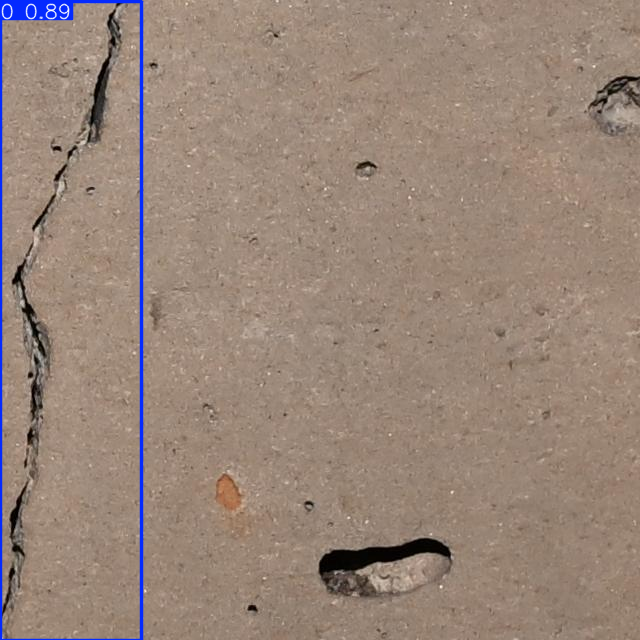

In [5]:
# Validate
metrics = model.val()
print(f"mAP50-95: {metrics.box.map}")

# Test on a random image
test_images = os.listdir(f"{dataset.location}/test/images")
if test_images:
    test_img = f"{dataset.location}/test/images/{test_images[0]}"
    results = model.predict(test_img)
    results[0].show()
else:
    print("No test images found. Check dataset structure.")


## 4. Performance Evaluation & Visualization
Visualize training curves, confusion matrix, and sample predictions.


---



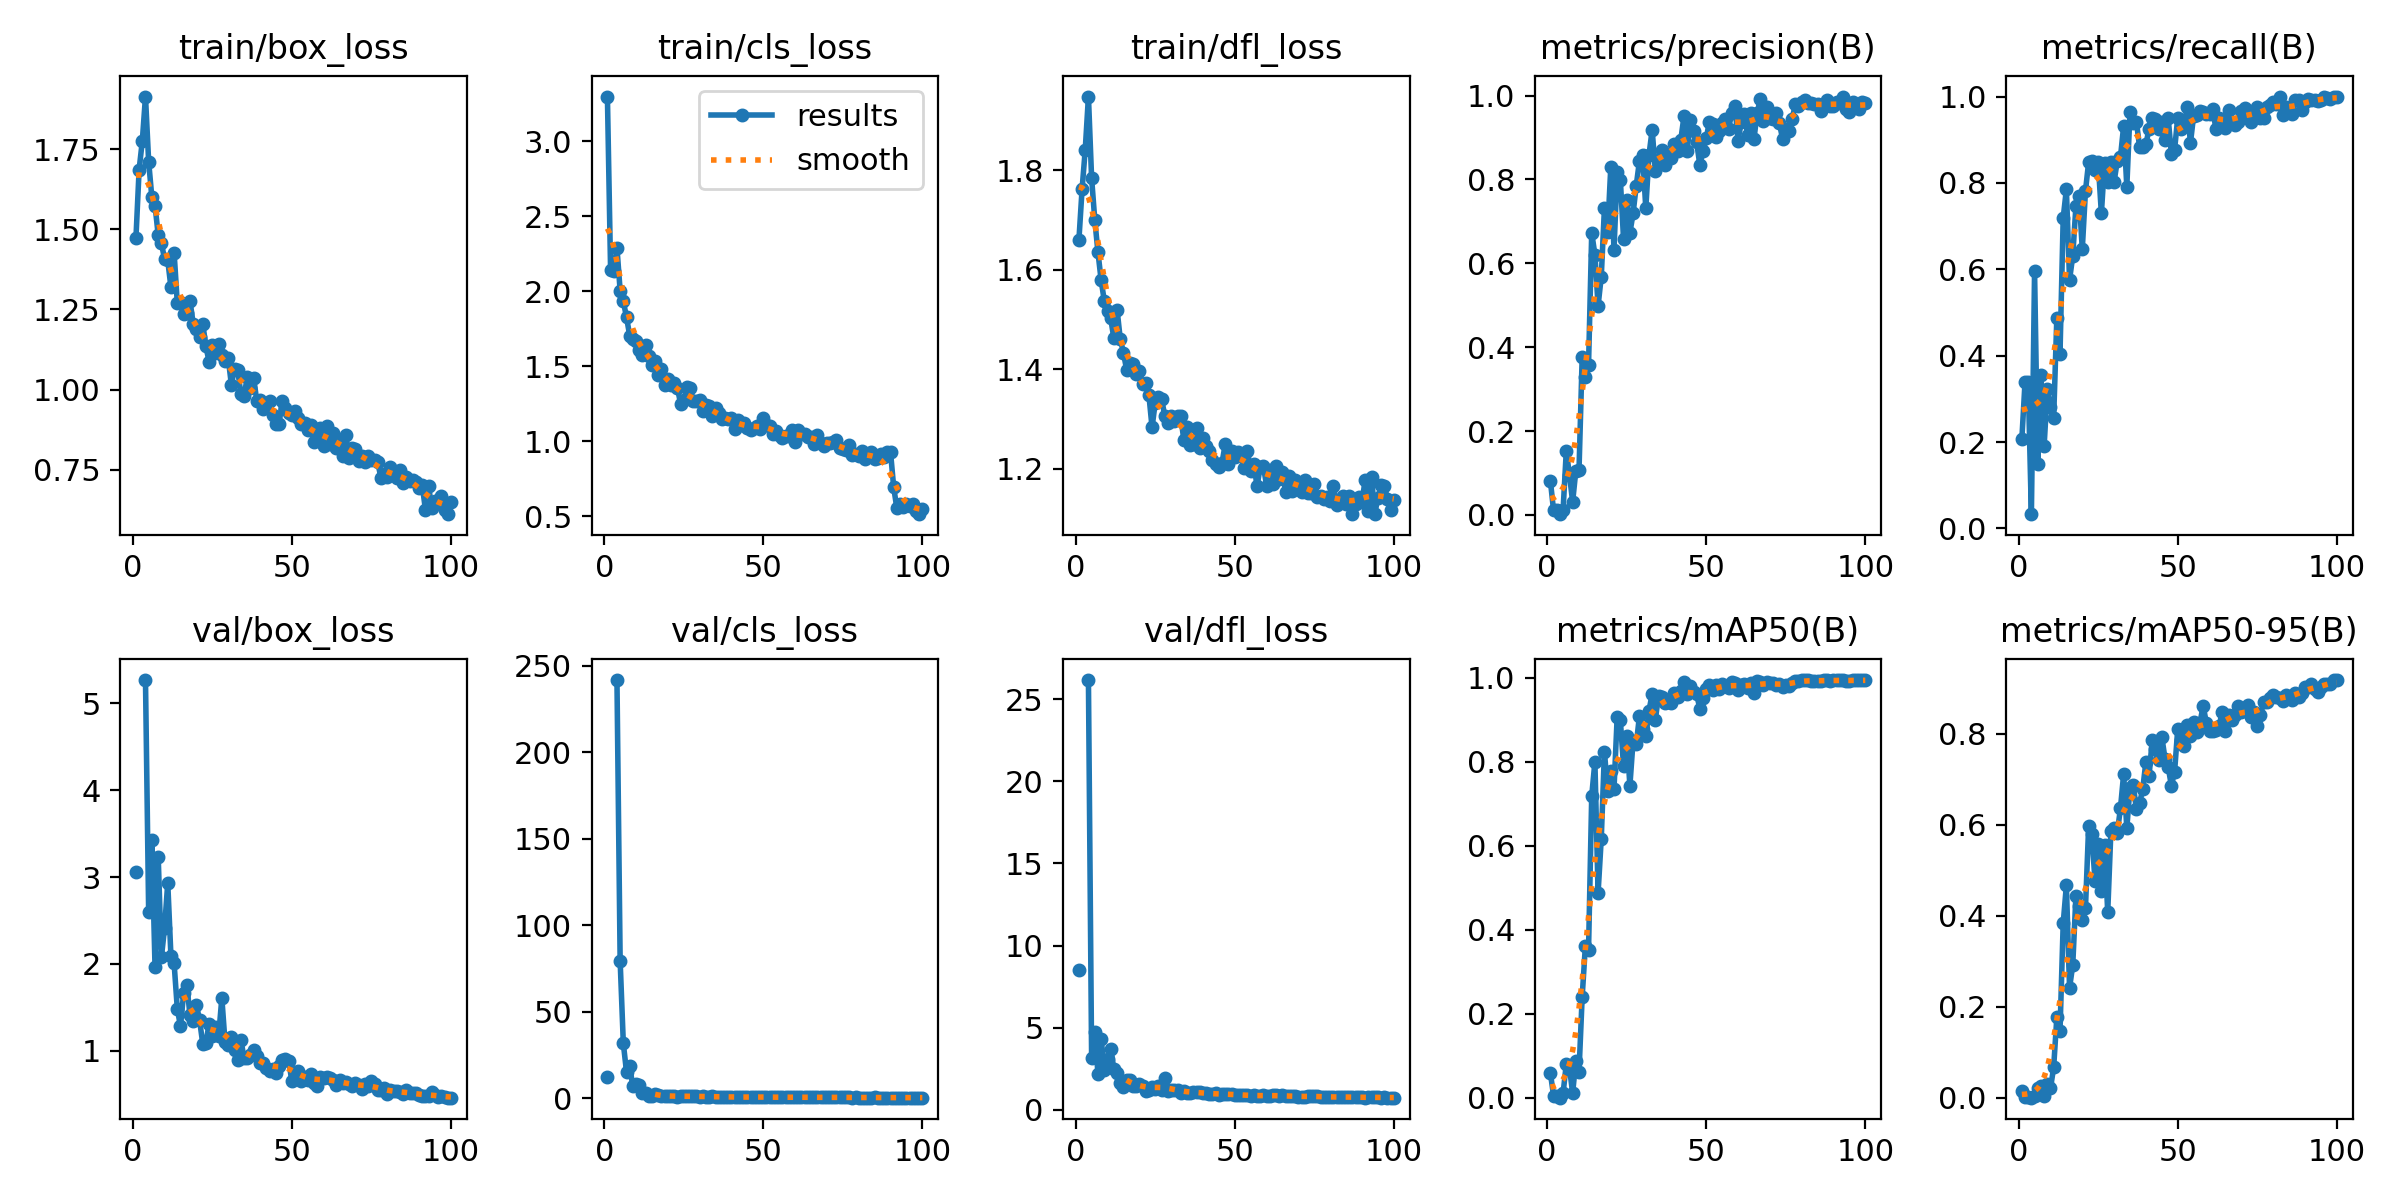

In [6]:
from IPython.display import Image, display
import os

# Adjust the path to your run directory (e.g., exp, exp2, etc.)
results_path = "/content/yolov12/runs/detect/yolov12_custom_training/results.png"
if not os.path.exists(results_path):
    # For YOLOv9 or other runs, adjust path accordingly
    results_path = "/content/yolov9/runs/train/exp2/results.png"

display(Image(filename=results_path, width=1000))


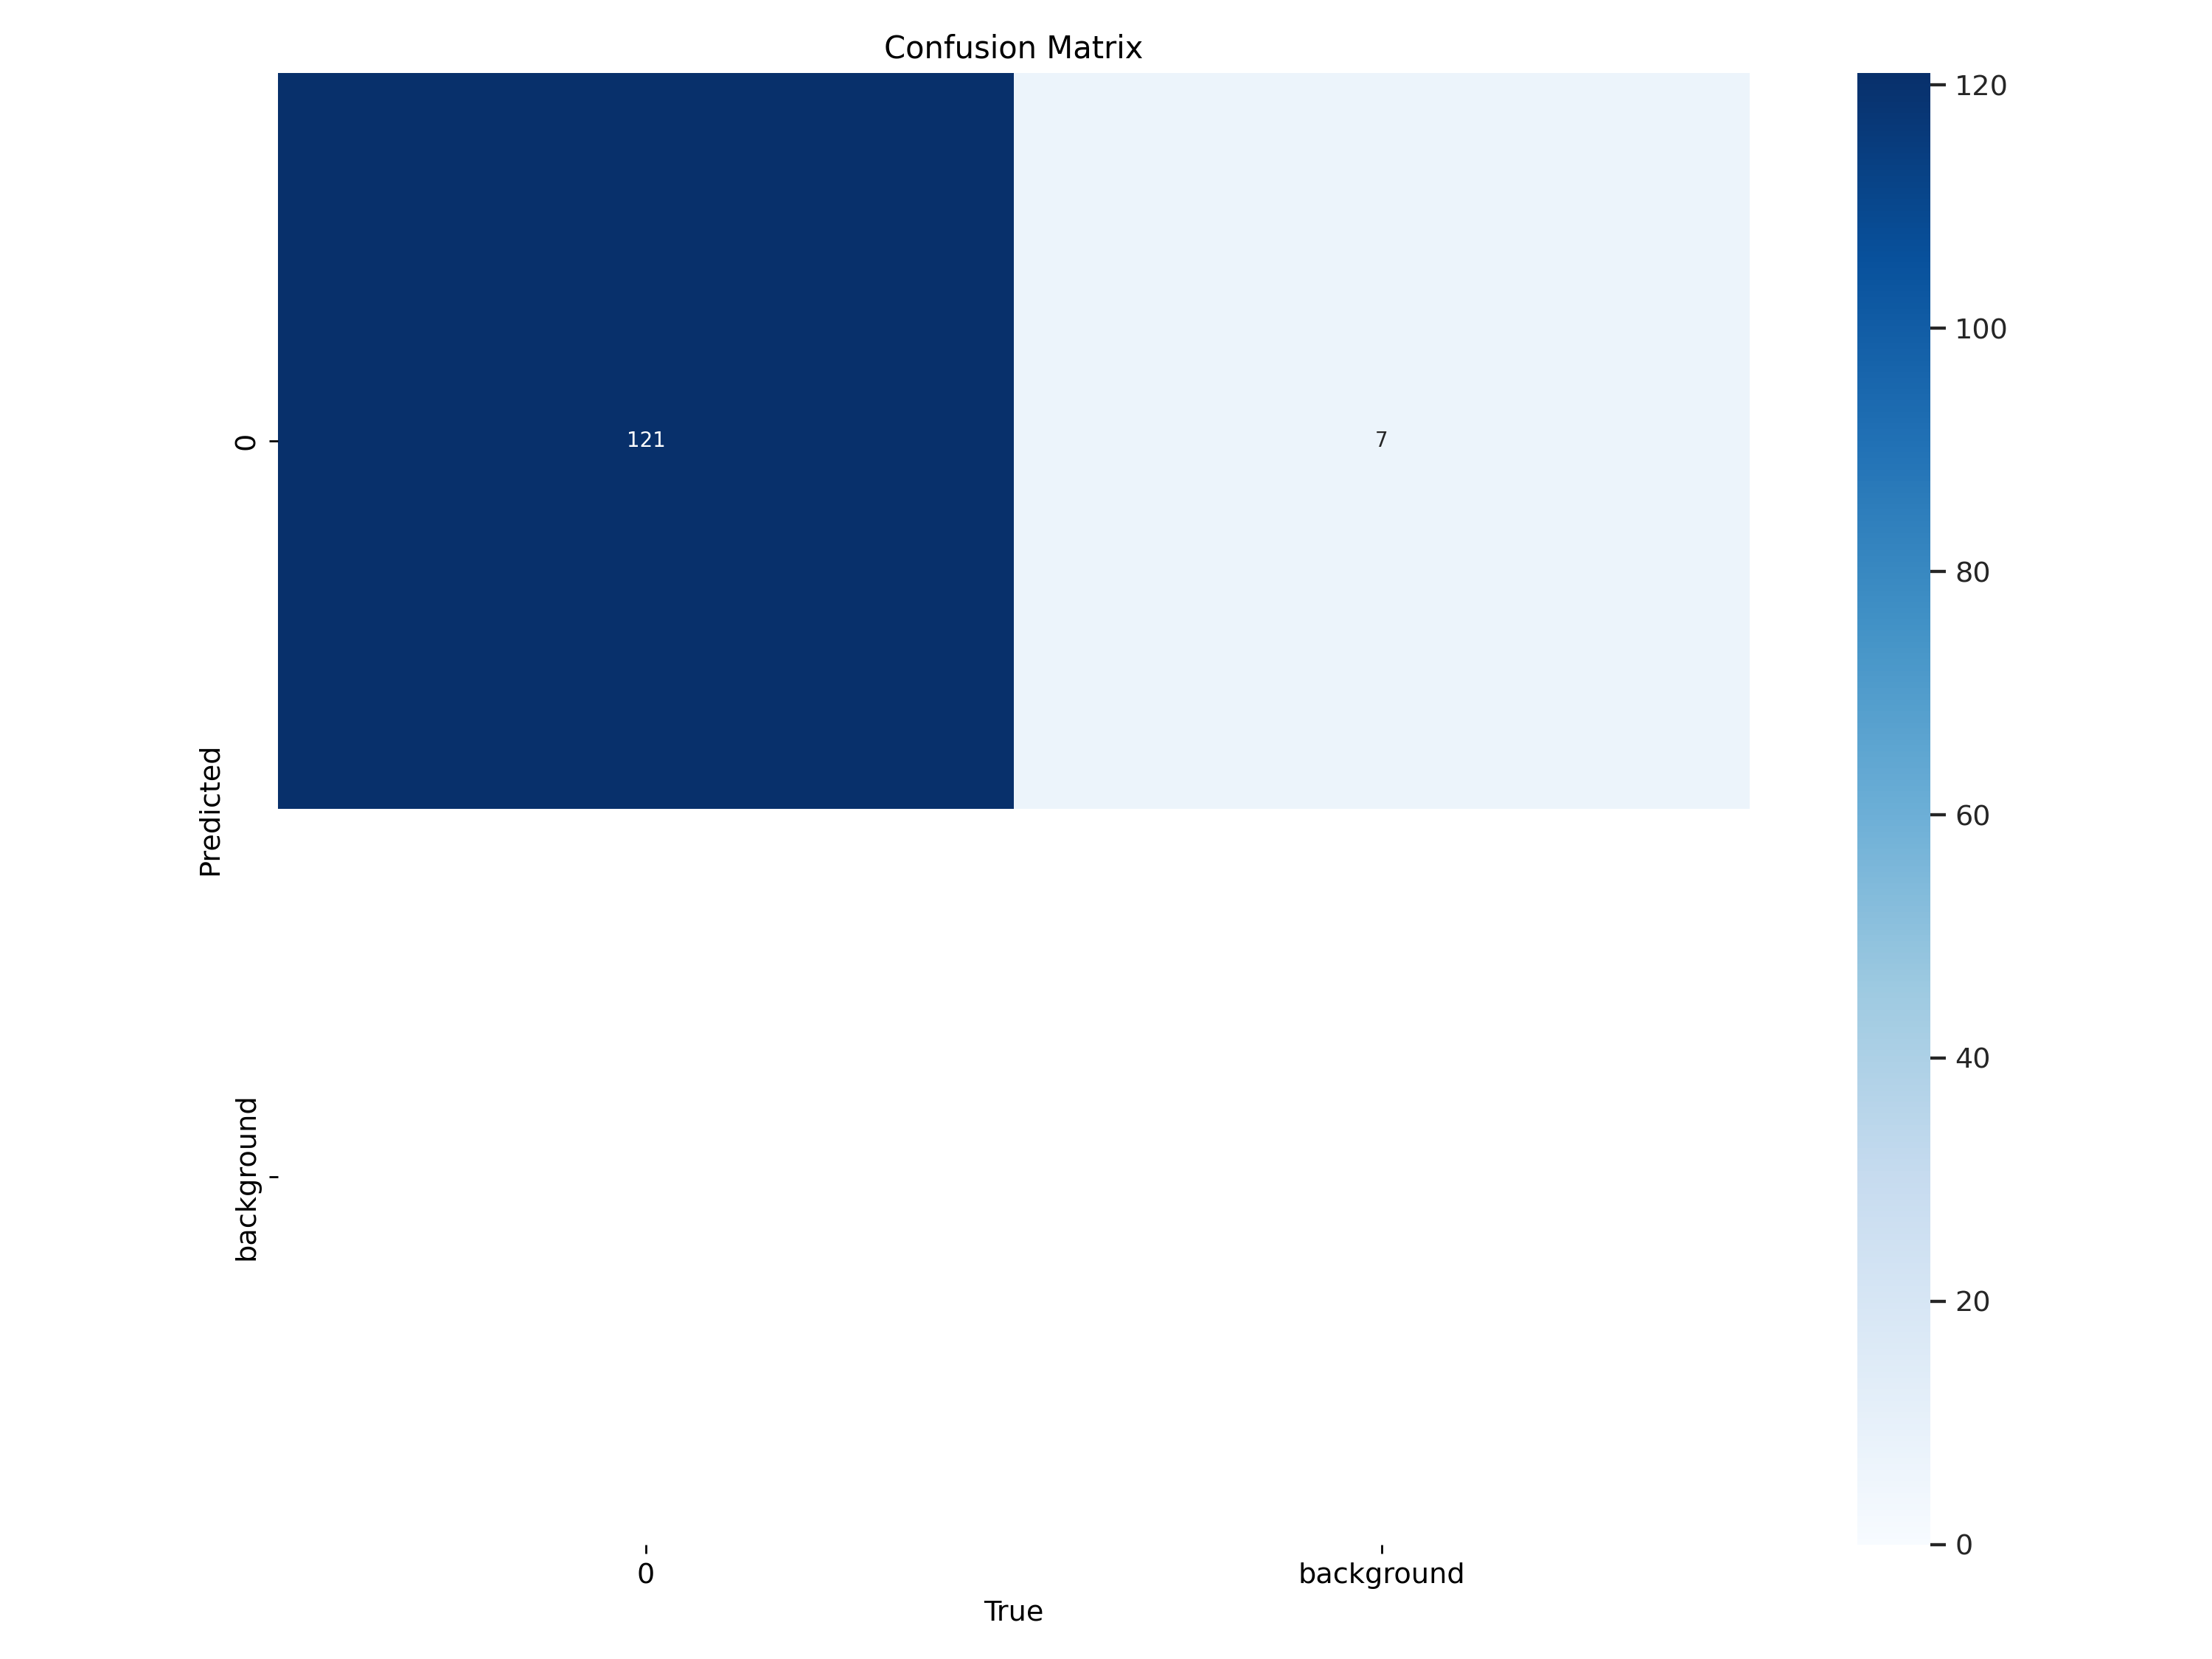

In [7]:
cm_path = "/content/yolov12/runs/detect/yolov12_custom_training/confusion_matrix.png"
if not os.path.exists(cm_path):
    cm_path = "/content/yolov9/runs/train/exp2/confusion_matrix.png"

display(Image(filename=cm_path, width=700))


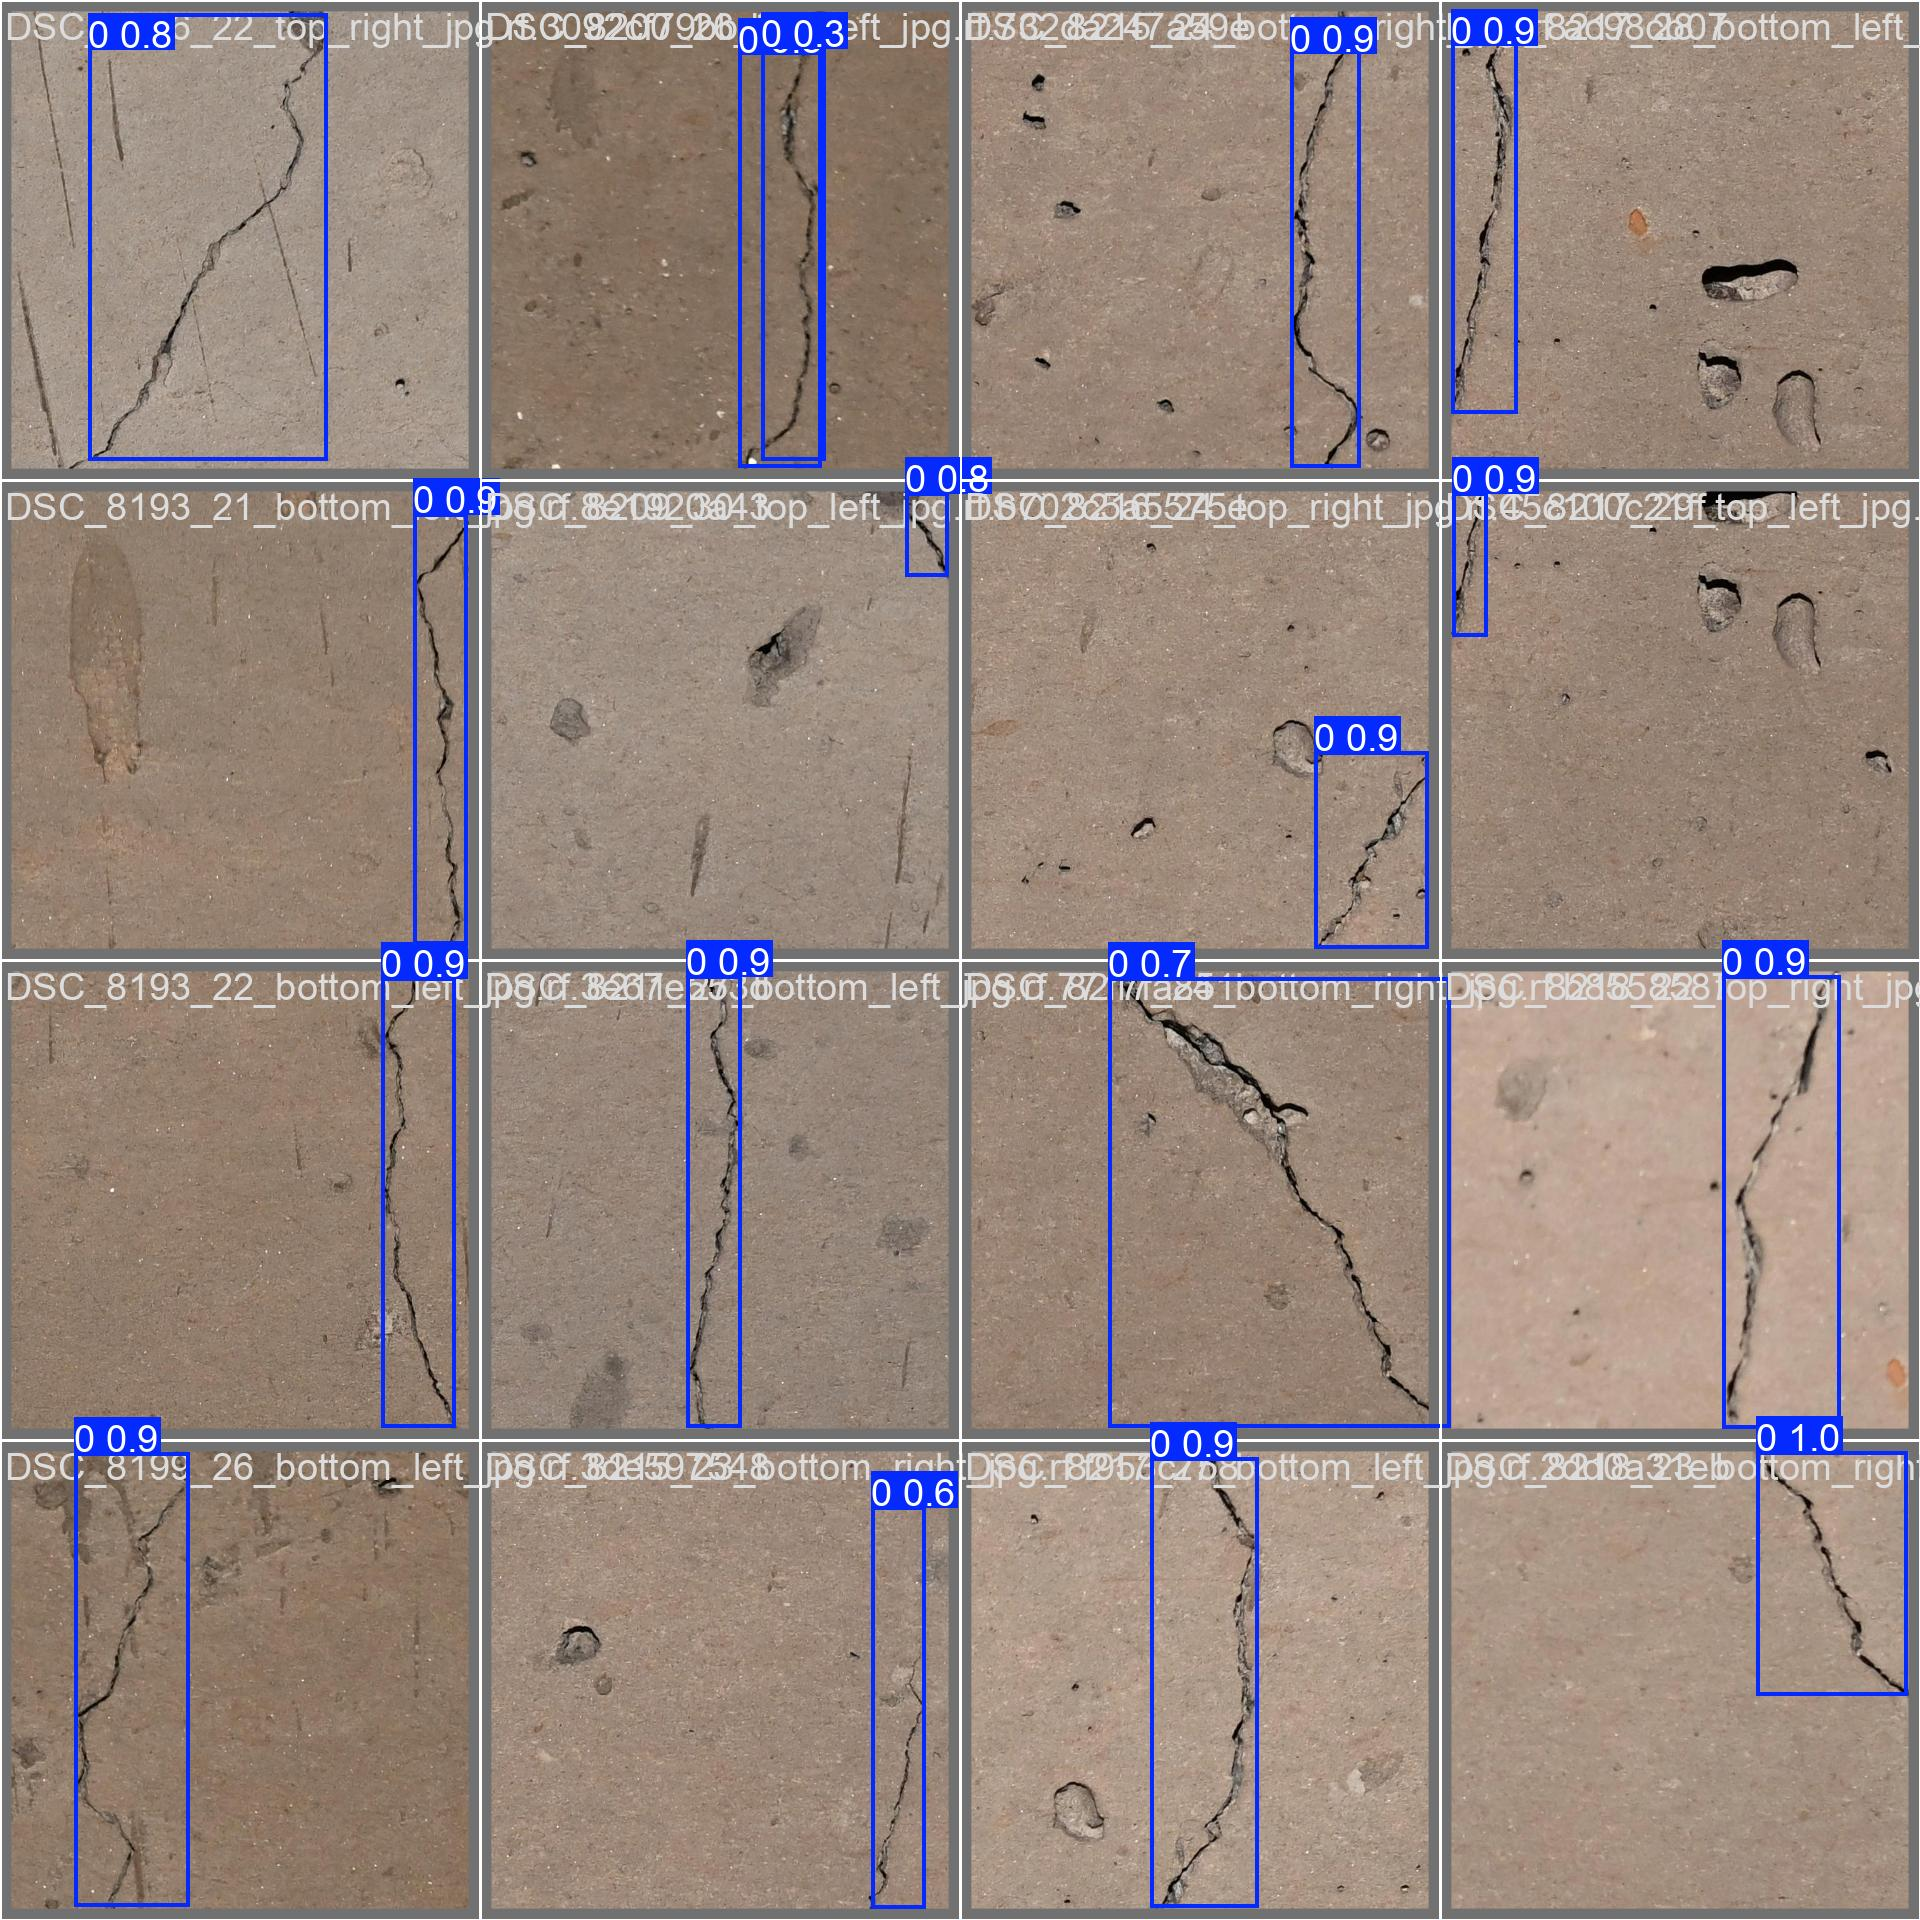

In [8]:
pred_img = "/content/yolov12/runs/detect/yolov12_custom_training/val_batch0_pred.jpg"
if not os.path.exists(pred_img):
    pred_img = "/content/yolov9/runs/train/exp2/val_batch0_pred.jpg"

display(Image(filename=pred_img, width=600))


## 5. Inference on Custom Images
Upload your own image and see detection results.


Saving 8.jpg to 8.jpg
Renamed '8.jpg' to '8.jpg'
File exists: 8.jpg (117307 bytes)

image 1/1 /content/yolov12/8.jpg: 448x640 14 persons, 7 cars, 5 traffic lights, 85.4ms
Speed: 6.9ms preprocess, 85.4ms inference, 1.8ms postprocess per image at shape (1, 3, 448, 640)
Results saved to /content/yolov12/runs/detect/predict
Results saved in: runs/detect/predict


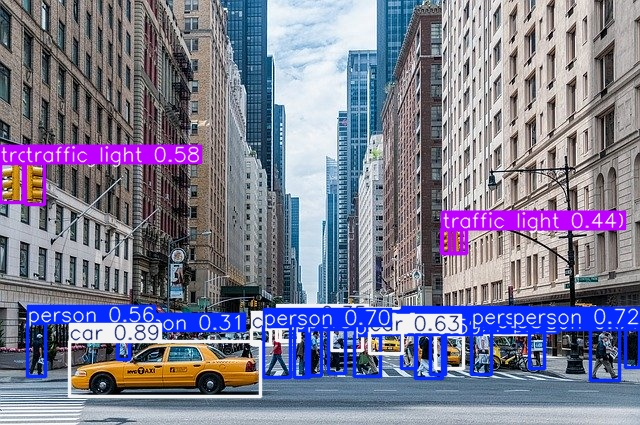

In [9]:
from google.colab import files
from ultralytics import YOLO
from IPython.display import Image, display
import os
import shutil
import glob

# Step 1: Upload an image
uploaded = files.upload()

# Step 2: Clean the filename
original_name = next(iter(uploaded))
clean_name = original_name.replace(" ", "_").replace("(", "").replace(")", "")
if clean_name != original_name:
    shutil.move(original_name, clean_name)
print(f"Renamed '{original_name}' to '{clean_name}'")

# Step 3: Confirm the file exists
if os.path.exists(clean_name):
    print(f"File exists: {clean_name} ({os.path.getsize(clean_name)} bytes)")
else:
    raise FileNotFoundError(f"File not found: {clean_name}")

# Step 4: Load YOLOv12 model
model = YOLO('yolov12s.pt')  # Use 'yolov8s.pt' if YOLOv12 weights are unavailable

# Step 5: Run inference and save the result image
results = model.predict(clean_name, save=True)

# Step 6: Find the latest prediction folder and display the result
predict_dirs = sorted(glob.glob('runs/detect/predict*'), key=os.path.getmtime, reverse=True)
if predict_dirs:
    latest_predict_dir = predict_dirs[0]
    print(f"Results saved in: {latest_predict_dir}")
    # Find the result image (matching the cleaned filename)
    pred_images = [f for f in os.listdir(latest_predict_dir) if f.endswith(('.jpg', '.png', '.jpeg'))]
    # Try to find the exact match, else display the first image
    match = [img for img in pred_images if clean_name in img]
    img_to_show = match[0] if match else (pred_images[0] if pred_images else None)
    if img_to_show:
        display(Image(filename=os.path.join(latest_predict_dir, img_to_show), width=800))
    else:
        print("No prediction images found in", latest_predict_dir)
else:
    print("No prediction directory found.")


## 6. Conclusion

- Successfully trained and evaluated YOLOv12 on a custom dataset.
- Achieved strong detection performance.


## 📚 References
- [YOLOv12 GitHub](https://github.com/sunsmarterjie/yolov12)
- [Roboflow Universe](https://universe.roboflow.com/)
- [Ultralytics YOLO Docs](https://docs.ultralytics.com/)
